# Interruptions in Oral Arguments of the Supreme Court

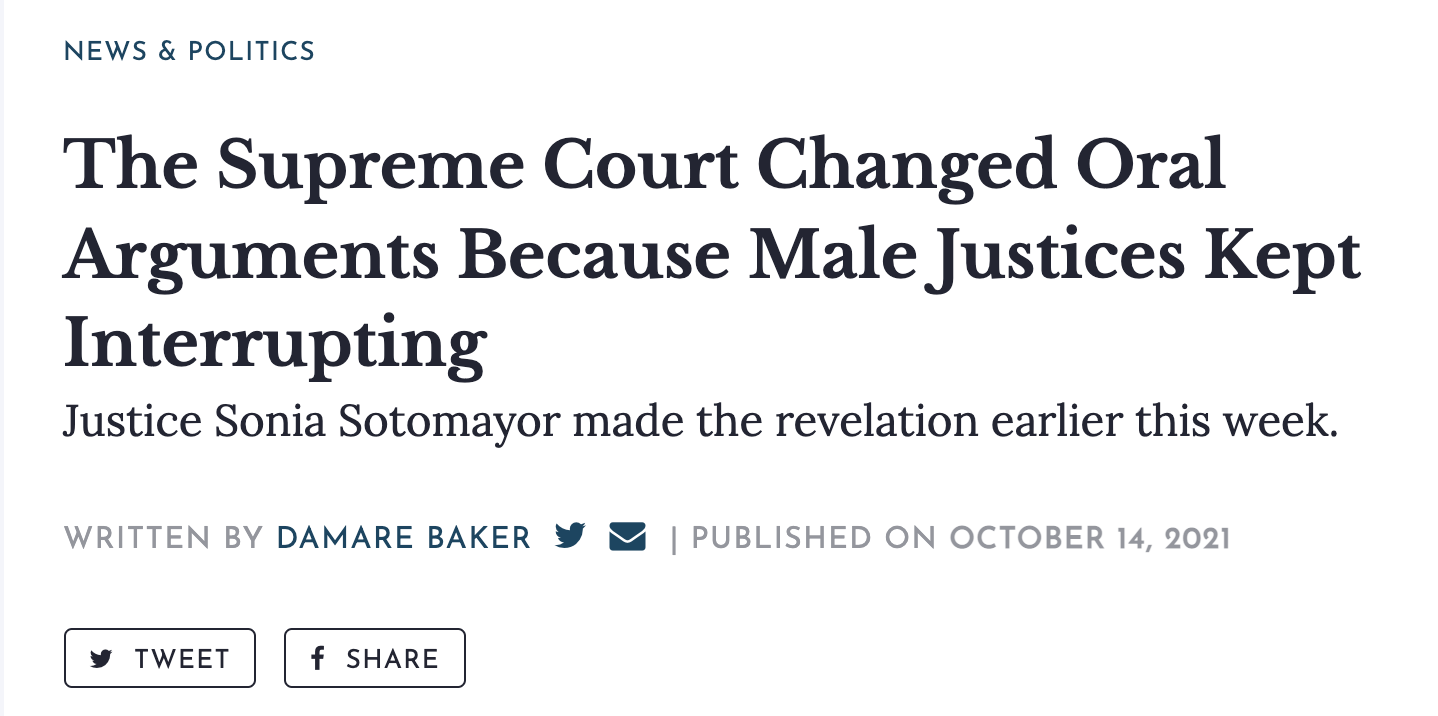

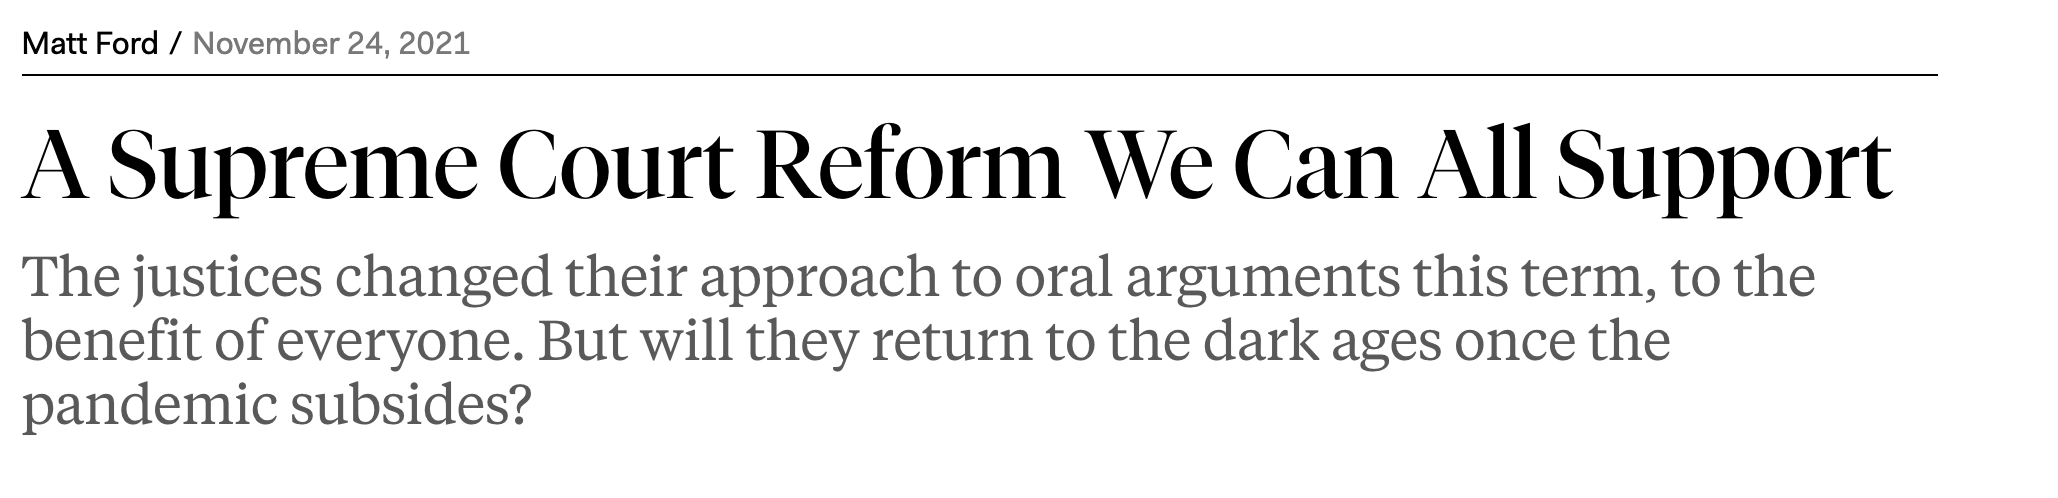

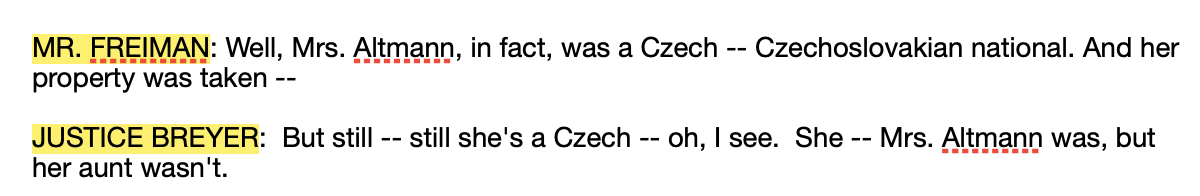

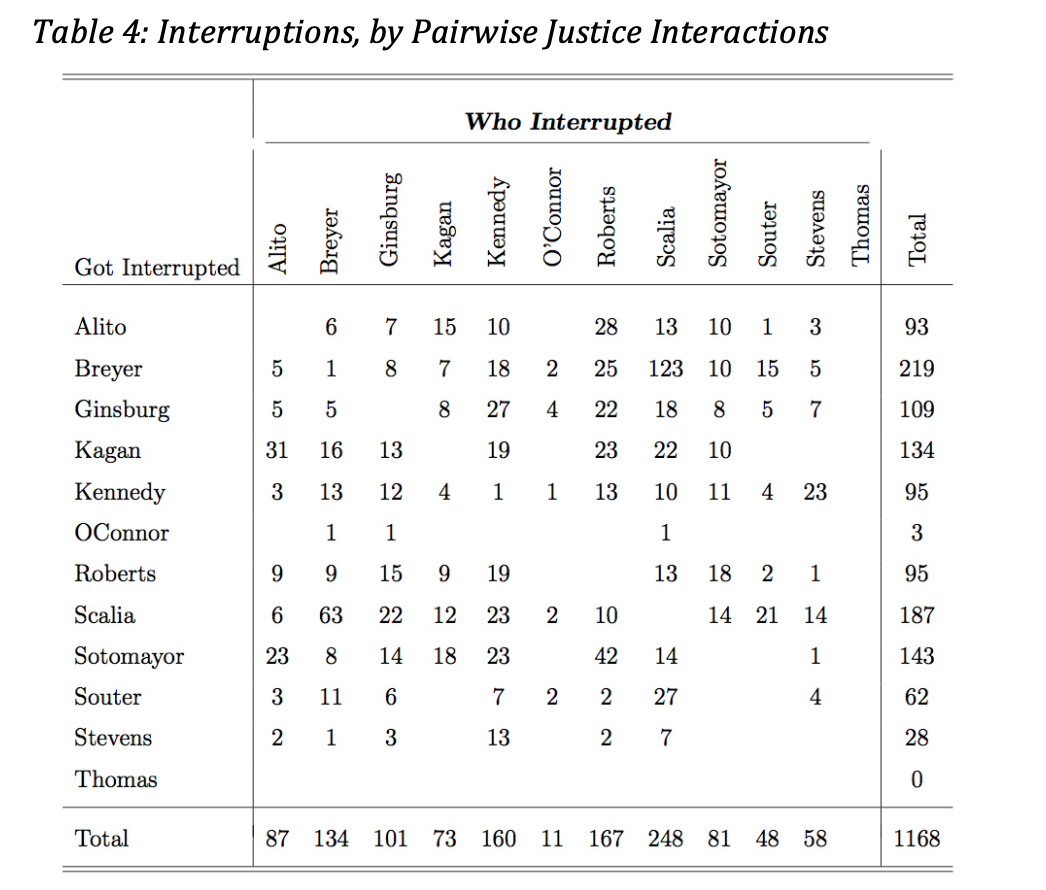

JUSTICE,	INTERRUPTED:	THE	EFFECT	OF	GENDER,	IDEOLOGY, AND SENIORITY	AT	SUPREME	COURT	ORAL	ARGUMENTS
https://www.virginialawreview.org/wp-content/uploads/2020/12/JacobiSchweers_Online.pdf 

**STEP 1:** scrape all of the case information available on this page: https://www.supremecourt.gov/oral_arguments/argument_transcript/2020
1. Case Name 
2. Date argued 
3. Docket Number 
4. PDF link

I am going to do 2020, 2019 & 2018. 

In [1]:
import requests
from bs4 import BeautifulSoup

Let's scrape 2020 first:

In [2]:
raw_html = requests.get('https://www.supremecourt.gov/oral_arguments/argument_transcript/2020')
soup_doc = BeautifulSoup(raw_html.content, "html.parser")

In [3]:
all_rows = []
the_tables = soup_doc.find_all(class_='table table-bordered')
for mytable in the_tables:
    rows = soup_doc.find_all('tr')
    for row in rows[1:]:
        myrow = []
        info = row.find_all('td')
        for data in info:
            myrow.append(data.text)
            link = row.td.a["href"]
            myrow.append(link)
        all_rows.append(myrow)
all_rows 

[[],
 ['20-543 Yellen v. Confederated Tribes of Chehalis Reservation',
  '../argument_transcripts/2020/20-543_hgci.pdf',
  '04/19/21',
  '../argument_transcripts/2020/20-543_hgci.pdf'],
 ['20-315 Santos Sanchez v. Mayorkas',
  '../argument_transcripts/2020/20-315_l647.pdf',
  '04/19/21',
  '../argument_transcripts/2020/20-315_l647.pdf'],
 ['19-8709 Greer v. United States',
  '../argument_transcripts/2020/19-8709_5hek.pdf',
  '04/20/21',
  '../argument_transcripts/2020/19-8709_5hek.pdf'],
 ['20-444 United States v. Gary',
  '../argument_transcripts/2020/20-444_5i26.pdf',
  '04/20/21',
  '../argument_transcripts/2020/20-444_5i26.pdf'],
 ['20-334 San Antonio v. Hotels.com, L.P.',
  '../argument_transcripts/2020/20-334_p86b.pdf',
  '04/21/21',
  '../argument_transcripts/2020/20-334_p86b.pdf'],
 ['20-440 Minerva Surgical, Inc. v. Hologic, Inc.',
  '../argument_transcripts/2020/20-440_k5fm.pdf',
  '04/21/21',
  '../argument_transcripts/2020/20-440_k5fm.pdf'],
 ['19-251 Americans for Prosperi

Now let's scrape 2019:

In [4]:
two_html = requests.get('https://www.supremecourt.gov/oral_arguments/argument_transcript/2019')
soup_two = BeautifulSoup(two_html.content, "html.parser")

In [5]:
all_the_rows = []
all_the_tables = soup_two.find_all(class_='table table-bordered')
for my_main_table in all_the_tables:
    the_rows = soup_two.find_all('tr')
    for row in the_rows[1:]:
        my_main_row = []
        the_info = row.find_all('td')
        for the_data in the_info:
            my_main_row.append(the_data.text)
            the_link = row.td.a["href"]
            my_main_row.append(the_link)
        all_the_rows.append(my_main_row)
all_the_rows

[[],
 ['19-46 Patent and Trademark Office v. Booking.com B.V.',
  '../argument_transcripts/2019/19-46_bq7d.pdf',
  '05/04/20',
  '../argument_transcripts/2019/19-46_bq7d.pdf'],
 ['19-177 Agency for Int’l Development v. Alliance for Open Society Int’l, Inc.',
  '../argument_transcripts/2019/19-177_p8k0.pdf',
  '05/05/20',
  '../argument_transcripts/2019/19-177_p8k0.pdf'],
 ['19-431 Little Sisters of the Poor Saints Peter and Paul Home v. Pennsylvania',
  '../argument_transcripts/2019/19-431_d1o2.pdf',
  '05/06/20',
  '../argument_transcripts/2019/19-431_d1o2.pdf'],
 ['19-631 Barr v. American Assn. of Political Consultants, Inc.',
  '../argument_transcripts/2019/19-631_omjp.pdf',
  '05/06/20',
  '../argument_transcripts/2019/19-631_omjp.pdf'],
 ['18-9526 McGirt v. Oklahoma',
  '../argument_transcripts/2019/18-9526_n758.pdf',
  '05/11/20',
  '../argument_transcripts/2019/18-9526_n758.pdf'],
 ['19-267 Our Lady of Guadalupe School v. Morrissey-Berru',
  '../argument_transcripts/2019/19-267_

I'm going to try & put stuff in a datframe now...

In [6]:
import pandas as pd

/Users/misha/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


This is the dataframe just for 2020

In [7]:
df_one = pd.DataFrame(all_rows)
df_one

,0,1,2,3
0,None,None,None,None
1,20-543 Yellen v. Confederated Tribes of Chehal...,../argument_transcripts/2020/20-543_hgci.pdf,04/19/21,../argument_transcripts/2020/20-543_hgci.pdf
2,20-315 Santos Sanchez v. Mayorkas,../argument_transcripts/2020/20-315_l647.pdf,04/19/21,../argument_transcripts/2020/20-315_l647.pdf
3,19-8709 Greer v. United States,../argument_transcripts/2020/19-8709_5hek.pdf,04/20/21,../argument_transcripts/2020/19-8709_5hek.pdf
4,20-444 United States v. Gary,../argument_transcripts/2020/20-444_5i26.pdf,04/20/21,../argument_transcripts/2020/20-444_5i26.pdf
...,...,...,...,...
450,19-368 Ford Motor Co. v. Montana Eighth Judici...,../argument_transcripts/2020/19-368_m648.pdf,10/07/20,../argument_transcripts/2020/19-368_m648.pdf
451,19-108 United States v. Briggs,../argument_transcripts/2020/19-108_e1p3.pdf,10/13/20,../argument_transcripts/2020/19-108_e1p3.pdf
452,19-357 Chicago v. Fulton,../argument_transcripts/2020/19-357_2b35.pdf,10/13/20,../argument_transcripts/2020/19-357_2b35.pdf
453,19-292 Torres v. Madrid,../argument_transcripts/2020/19-292_5hdk.pdf,10/14/20,../argument_transcripts/2020/19-292_5hdk.pdf


In [8]:
df_one.columns = ["case name", "link", "date", "remove"]
df_one

,case name,link,date,remove
0,None,None,None,None
1,20-543 Yellen v. Confederated Tribes of Chehal...,../argument_transcripts/2020/20-543_hgci.pdf,04/19/21,../argument_transcripts/2020/20-543_hgci.pdf
2,20-315 Santos Sanchez v. Mayorkas,../argument_transcripts/2020/20-315_l647.pdf,04/19/21,../argument_transcripts/2020/20-315_l647.pdf
3,19-8709 Greer v. United States,../argument_transcripts/2020/19-8709_5hek.pdf,04/20/21,../argument_transcripts/2020/19-8709_5hek.pdf
4,20-444 United States v. Gary,../argument_transcripts/2020/20-444_5i26.pdf,04/20/21,../argument_transcripts/2020/20-444_5i26.pdf
...,...,...,...,...
450,19-368 Ford Motor Co. v. Montana Eighth Judici...,../argument_transcripts/2020/19-368_m648.pdf,10/07/20,../argument_transcripts/2020/19-368_m648.pdf
451,19-108 United States v. Briggs,../argument_transcripts/2020/19-108_e1p3.pdf,10/13/20,../argument_transcripts/2020/19-108_e1p3.pdf
452,19-357 Chicago v. Fulton,../argument_transcripts/2020/19-357_2b35.pdf,10/13/20,../argument_transcripts/2020/19-357_2b35.pdf
453,19-292 Torres v. Madrid,../argument_transcripts/2020/19-292_5hdk.pdf,10/14/20,../argument_transcripts/2020/19-292_5hdk.pdf


In [9]:
df_one = df_one.drop(['remove'], axis=1)
df_one

,case name,link,date
0,None,None,None
1,20-543 Yellen v. Confederated Tribes of Chehal...,../argument_transcripts/2020/20-543_hgci.pdf,04/19/21
2,20-315 Santos Sanchez v. Mayorkas,../argument_transcripts/2020/20-315_l647.pdf,04/19/21
3,19-8709 Greer v. United States,../argument_transcripts/2020/19-8709_5hek.pdf,04/20/21
4,20-444 United States v. Gary,../argument_transcripts/2020/20-444_5i26.pdf,04/20/21
...,...,...,...
450,19-368 Ford Motor Co. v. Montana Eighth Judici...,../argument_transcripts/2020/19-368_m648.pdf,10/07/20
451,19-108 United States v. Briggs,../argument_transcripts/2020/19-108_e1p3.pdf,10/13/20
452,19-357 Chicago v. Fulton,../argument_transcripts/2020/19-357_2b35.pdf,10/13/20
453,19-292 Torres v. Madrid,../argument_transcripts/2020/19-292_5hdk.pdf,10/14/20


Here I am trying to add the docket numnber into a new column 

In [10]:
df_one[['docket number','case']] = df_one['case name'].str.split(r'^.{0,6}',2, expand=True)
df_one

,case name,link,date,docket number,case
0,None,None,None,None,None
1,20-543 Yellen v. Confederated Tribes of Chehal...,../argument_transcripts/2020/20-543_hgci.pdf,04/19/21,,Yellen v. Confederated Tribes of Chehalis Res...
2,20-315 Santos Sanchez v. Mayorkas,../argument_transcripts/2020/20-315_l647.pdf,04/19/21,,Santos Sanchez v. Mayorkas
3,19-8709 Greer v. United States,../argument_transcripts/2020/19-8709_5hek.pdf,04/20/21,,9 Greer v. United States
4,20-444 United States v. Gary,../argument_transcripts/2020/20-444_5i26.pdf,04/20/21,,United States v. Gary
...,...,...,...,...,...
450,19-368 Ford Motor Co. v. Montana Eighth Judici...,../argument_transcripts/2020/19-368_m648.pdf,10/07/20,,Ford Motor Co. v. Montana Eighth Judicial Dis...
451,19-108 United States v. Briggs,../argument_transcripts/2020/19-108_e1p3.pdf,10/13/20,,United States v. Briggs
452,19-357 Chicago v. Fulton,../argument_transcripts/2020/19-357_2b35.pdf,10/13/20,,Chicago v. Fulton
453,19-292 Torres v. Madrid,../argument_transcripts/2020/19-292_5hdk.pdf,10/14/20,,Torres v. Madrid


In [11]:
df_one['docket number'] = df_one['case name'].str[:6]
df_one

,case name,link,date,docket number,case
0,None,None,None,None,None
1,20-543 Yellen v. Confederated Tribes of Chehal...,../argument_transcripts/2020/20-543_hgci.pdf,04/19/21,20-543,Yellen v. Confederated Tribes of Chehalis Res...
2,20-315 Santos Sanchez v. Mayorkas,../argument_transcripts/2020/20-315_l647.pdf,04/19/21,20-315,Santos Sanchez v. Mayorkas
3,19-8709 Greer v. United States,../argument_transcripts/2020/19-8709_5hek.pdf,04/20/21,19-870,9 Greer v. United States
4,20-444 United States v. Gary,../argument_transcripts/2020/20-444_5i26.pdf,04/20/21,20-444,United States v. Gary
...,...,...,...,...,...
450,19-368 Ford Motor Co. v. Montana Eighth Judici...,../argument_transcripts/2020/19-368_m648.pdf,10/07/20,19-368,Ford Motor Co. v. Montana Eighth Judicial Dis...
451,19-108 United States v. Briggs,../argument_transcripts/2020/19-108_e1p3.pdf,10/13/20,19-108,United States v. Briggs
452,19-357 Chicago v. Fulton,../argument_transcripts/2020/19-357_2b35.pdf,10/13/20,19-357,Chicago v. Fulton
453,19-292 Torres v. Madrid,../argument_transcripts/2020/19-292_5hdk.pdf,10/14/20,19-292,Torres v. Madrid


In [12]:
df_one = df_one.drop(['case name'], axis=1)
df_one

,link,date,docket number,case
0,None,None,None,None
1,../argument_transcripts/2020/20-543_hgci.pdf,04/19/21,20-543,Yellen v. Confederated Tribes of Chehalis Res...
2,../argument_transcripts/2020/20-315_l647.pdf,04/19/21,20-315,Santos Sanchez v. Mayorkas
3,../argument_transcripts/2020/19-8709_5hek.pdf,04/20/21,19-870,9 Greer v. United States
4,../argument_transcripts/2020/20-444_5i26.pdf,04/20/21,20-444,United States v. Gary
...,...,...,...,...
450,../argument_transcripts/2020/19-368_m648.pdf,10/07/20,19-368,Ford Motor Co. v. Montana Eighth Judicial Dis...
451,../argument_transcripts/2020/19-108_e1p3.pdf,10/13/20,19-108,United States v. Briggs
452,../argument_transcripts/2020/19-357_2b35.pdf,10/13/20,19-357,Chicago v. Fulton
453,../argument_transcripts/2020/19-292_5hdk.pdf,10/14/20,19-292,Torres v. Madrid


AAAAND HERE IS THE DATAFRAME FOR 2020 SCRAPING:

In [13]:
df_one = df_one.reindex(['case','docket number','date', 'link'], axis=1)
df_one

,case,docket number,date,link
0,None,None,None,None
1,Yellen v. Confederated Tribes of Chehalis Res...,20-543,04/19/21,../argument_transcripts/2020/20-543_hgci.pdf
2,Santos Sanchez v. Mayorkas,20-315,04/19/21,../argument_transcripts/2020/20-315_l647.pdf
3,9 Greer v. United States,19-870,04/20/21,../argument_transcripts/2020/19-8709_5hek.pdf
4,United States v. Gary,20-444,04/20/21,../argument_transcripts/2020/20-444_5i26.pdf
...,...,...,...,...
450,Ford Motor Co. v. Montana Eighth Judicial Dis...,19-368,10/07/20,../argument_transcripts/2020/19-368_m648.pdf
451,United States v. Briggs,19-108,10/13/20,../argument_transcripts/2020/19-108_e1p3.pdf
452,Chicago v. Fulton,19-357,10/13/20,../argument_transcripts/2020/19-357_2b35.pdf
453,Torres v. Madrid,19-292,10/14/20,../argument_transcripts/2020/19-292_5hdk.pdf


Let's clean some text files and put it in a nice dataframe...

In [14]:
import re

In [15]:
import pandas as pd

In [23]:
files = ["18-540_8njqNEW",
"18-956_2dp3NEW", 
"18-1259_e2p3NEW",
"18-1447_apl1NEW",
"19-71_e2q3NEW",
"19-108_e1p3NEW",
"19-123_o758NEW",
"19-199_m6hnNEW",
"19-251_h3ciNEW",
"19-292_5hdkNEW",
"19-309_4425NEW",
"19-351_d0fiNEW",
"19-357_2b35NEW",
"19-368_m648NEW",
"19-416_6k47NEW",
"19-422_4gdjNEW",
"19-438_q713NEW",
"19-508_3f14NEW",
"19-511_l537NEW",
"19-546_2d9gNEW",
"19-547_c07dNEW",
"19-783_2d8fNEW",
"19-840_1a72NEW",
"19-863_k5gmNEW",
"19-897_l537NEW",
"19-930_c07eNEW",
"19-963_2c8fNEW",
"19-968_6kh7NEW",
"19-1039_o7jqNEW",
"19-1155_6537NEW",
"19-1189_k53mNEW",
"19-1231_9ol1NEW",
"19-1257_1b7dNEW",
"19-1414_p86bNEW",
"19-1434_e1p3NEW",
"19-1442_9o6bNEW",
"19-5410_8n59NEW",
"19-5807_i4djNEW",
"19-8709_5hekNEW",
"20-18_986bNEW",
"20-107_n758NEW",
"20-157_5i36NEW",
"20-222_3fbhNEW",
"20-255_869dNEW",
"20-297_3ea4NEW",
"20-315_l647NEW",
"20-334_p86bNEW",
"20-366_7lhoNEW",
"20-382_4f14NEW",
"20-437_n758NEW",
"20-440_k5fmNEW",
"20-444_5i26NEW",
"20-472_bp7cNEW",
"20-512_g314NEW",
"20-543_hgciNEW",
"20-5904_1bn2NEW",]

final = []
for text in files:
    f = open('/Users/misha/Documents/Text_Files/' + text + ".txt", 'r')
    transcript=f.read()
    all_dockets = re.findall(r"\d\d-.*",transcript,re.M) 
    docket = all_dockets[0]
    
    transcript =re.sub(r"\n"," ", transcript)
    transcript_clean = re.sub('Heritage Reporting Corporation',  '',    transcript)        
    transcript_clean = re.sub("  \d+ ", " ", transcript_clean)
    transcript_clean = transcript_clean.split(".m.)   ")
    transcript_clean = transcript_clean[1]
    transcript_clean = transcript_clean.split("was submitted.)")
    transcript_clean = transcript_clean[0]
    clean_text = re.split(r'([A-Z][A-Z ]+:)', transcript_clean)
    clean_text.pop(0)
    dialogue = clean_text[::2]
    speakers = clean_text[1::2]
    
    main_list = ([i for i in zip(dialogue, speakers)])
    
    df = pd.DataFrame(main_list)
    df['docket'] = docket 
    df.columns.values[0] = "speaker"
    df.columns.values[1] = "text"
    
    final.append(df)
df_final = pd.concat(final)
df_final.head(5)


,speaker,text,docket
0,CHIEF JUSTICE ROBERTS:,"We'll hear argument first this morning in Case 18-540, Rutledge versus Pharmaceutical Care Management Association. General Bronni. ORAL ARGUMENT OF NICHOLAS J. BRONNI ON BEHALF OF THE PETITIONER MR.",18-540
1,BRONNI:,"Thank you, Mr. Chief Justice, and may it please the Court: Pharmacy Benefit Managers are drug middlemen that reimburse pharmacists for the cost of prescription drugs. Those reimbursements are frequently below a pharmacist's cost. That drives pharmacists out of business, and it has left many communities without a pharmacist. Act 900 responded to that practice by regulating what PBMs pay pharmacists. That response isn't preempted for three reasons. It doesn't regulate benefits, it doesn't regulate plan administration, and it doesn't regulate -- or discriminate against ERISA entities. First, Act 900 does not regulate Official - Subject to Final Review benefits. Instead, it regulates the price of drugs that a plan has already decided to cover. That's rate regulation, and under Travelers, that's not preempted, and that's because cost differences don't force plans to behave differently in different states and thus don't interfere with uniform administration. Second, ERISA doesn't preempt laws that implement or enforce rate regulation. Indeed, absent enforcement, there's no regulation. And Respondent doesn't dispute that Act 900's enforcement mechanisms implement Arkansas's rate regulation. Nor, for that matter, do those mechanisms regulate plan administration. Rather, they regulate PBM reimbursement practices, and plans don't control those practices. Instead, those practices are governed by PBM pharmacy contracts that aren't even shared with plans. And it therefore defies common sense to suggest that Act 900 regulates plan administration. There is no ""connection with"" problem. Third, Act 900 does not refer to ERISA. Under Dillingham, only laws that treat Official - Subject to Final Review ERISA plans differently contain a prohibited reference and are preempted. Respondent doesn't even attempt to argue that's true here. Nor could it, since Act 900 applies to PBMs that work for both ERISA and non-ERISA entities. This Court should reverse the judgment below.",18-540
2,CHIEF JUSTICE ROBERTS:,"Counsel, your basic point, it seems to me, is that the law regulates drug prices. That's certainly the -- the purpose of it. But it doesn't say anything about drug prices. Instead, it talks about what plans have to pay for benefits, the methodology of determining the amount to be paid, the timing and procedures for updating payment schedules, the dispute resolution processes, remedies. It has things like the authorizing, declining to dispense. I -- I mean, at the end of the day, all this might have an impact on drug prices, but it seems to me that it's very different, and those differences really do go to what ERISA is trying to regulate. MR.",18-540
3,BRONNI:,"Well, Your Honor, I -- I think, at the end of the day, the one thing that 6 Official - Subject to Final Review affects plans and, in fact, the only way in which the -- our law actually affects plans is it might alter the -- what plans ultimately pay. Our law does not apply directly to plans. Our law is directed at PBMs and -- and what PBMs pay pharmacies. So, in -- in that sense, the only effect on a plan or the only effect that a plan might see might be the possibility that, at the end of the day, it might pay a little bit more. But that's the same thing that was true in Travelers. In Travelers, when New York regulated what commercial insurers were paying hospitals with the surcharges, this Court acknowledged that -- that the odds were that those surcharges would be passed on to the plans, and that might affect how the -- the -- the benefits packages that the plans might choose to offer, it might influence their choice of administrator, but what the -- the Court emphasized is, at the end of the day, that that's just cost, and it

In [24]:
import pandas as pd

I am going to do some reg-ex on this dataframe before joining! 

In [18]:
pd.set_option('display.max_colwidth', -1)

/var/folders/7j/5h5yf6k54nz1ys4trym9bls40000gn/T/ipykernel_71141/3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [19]:
df_final = df_final.reindex(['docket', 'speaker', 'text'], axis=1)
df_final

docket                 speaker  \
0    18-540   CHIEF JUSTICE ROBERTS:   
1    18-540   BRONNI:                  
2    18-540   CHIEF JUSTICE ROBERTS:   
3    18-540   BRONNI:                  
4    18-540   CHIEF JUSTICE ROBERTS:   
..       ...                     ...   
263  20-5904  CHIEF JUSTICE ROBERTS:   
264  20-5904  MORTARA:                 
265  20-5904  CHIEF JUSTICE ROBERTS:   
266  20-5904  ADLER:                   
267  20-5904  CHIEF JUSTICE ROBERTS:   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [20]:
df_final

docket                 speaker  \
0    18-540   CHIEF JUSTICE ROBERTS:   
1    18-540   BRONNI:                  
2    18-540   CHIEF JUSTICE ROBERTS:   
3    18-540   BRONNI:                  
4    18-540   CHIEF JUSTICE ROBERTS:   
..       ...                     ...   
263  20-5904  CHIEF JUSTICE ROBERTS:   
264  20-5904  MORTARA:                 
265  20-5904  CHIEF JUSTICE ROBERTS:   
266  20-5904  ADLER:                   
267  20-5904  CHIEF JUSTICE ROBERTS:   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [25]:
df_final['interrputed'] = df_final.text.str.contains(r'--\n', regex=True, case=False)
df_final

speaker  \
0    CHIEF JUSTICE ROBERTS:   
1    BRONNI:                  
2    CHIEF JUSTICE ROBERTS:   
3    BRONNI:                  
4    CHIEF JUSTICE ROBERTS:   
..                      ...   
263  CHIEF JUSTICE ROBERTS:   
264  MORTARA:                 
265  CHIEF JUSTICE ROBERTS:   
266  ADLER:                   
267  CHIEF JUSTICE ROBERTS:   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [27]:
df_final.interrputed.value_counts()

False    13517
Name: interrputed, dtype: int64